# Exploratory Data Analysis of supermarket sales

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

###  EDA

In [3]:
sales = pd.read_csv('supermarket_sales.csv')

In [4]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
sales.columns = sales.columns.str.replace(' ','_')
sales.columns = sales.columns.str.lower()

In [6]:
sales.city.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: city, dtype: int64

In [7]:
sales.customer_type.value_counts()

Member    501
Normal    499
Name: customer_type, dtype: int64

In [8]:
sales.product_line.value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: product_line, dtype: int64

In [9]:
sales.payment.value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: payment, dtype: int64

In [10]:
sales['date'] = pd.to_datetime(sales['date'])

In [11]:
sales.resample('M', on='date').count()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
date,,,,,,,,,,,,,,,,,
2019-01-31,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352,352
2019-02-28,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303
2019-03-31,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345


In [12]:
s_sales = sales.drop(columns = ['gross_margin_percentage','tax_5%','branch'])

In [13]:
s_sales.head()

,invoice_id,city,customer_type,gender,product_line,unit_price,quantity,total,date,time,payment,cogs,gross_income,rating
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13:08,Ewallet,522.83,26.1415,9.1
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10:29,Cash,76.40,3.8200,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13:23,Credit card,324.31,16.2155,7.4
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,20:33,Ewallet,465.76,23.2880,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,10:37,Ewallet,604.17,30.2085,5.3


### Which city had better sales?

In [14]:
s_sales[['city', 'total']].groupby('city').sum().sort_values('total',ascending=False)

,total
city,
Naypyitaw,110568.7065
Yangon,106200.3705
Mandalay,106197.6720


In [15]:
s_sales[['city', 'total']].groupby('city').count()

,total
city,
Mandalay,332
Naypyitaw,328
Yangon,340


### Which payment method was the most common

In [16]:
s_sales[['payment', 'total']].groupby('payment').sum().sort_values('total',ascending=False)

,total
payment,
Cash,112206.570
Ewallet,109993.107
Credit card,100767.072


### Payment method percentage

In [17]:
payment_type = s_sales[['payment', 'total']].groupby('payment').sum().sort_values('total',ascending=False,\
                                                                                  ignore_index=False)

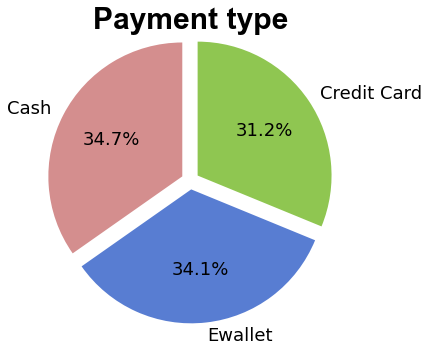

In [18]:
plt.figure(figsize=(4,6))
plt.title('Payment type', fontdict={'fontname':'Arial','fontsize':'30', 'fontweight': 'bold'}, pad=40)
exp = [.1,.1,.1]
plt.rcParams['font.size'] = 18
colors = ['#D48E8E', '#587DD2', '#8FC651']
plt.pie(payment_type.total, labels=['Cash','Ewallet','Credit Card'], startangle =90, autopct='%.1f%%', explode = exp,\
        radius=1.5, colors=colors)
plt.show()
